# TED Talks Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Load Data
df = pd.read_csv('/Users/ahuntley@uk.ibm.com/Desktop/Data Science Learning/*Python/TED Talks/ted_main.csv')
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [3]:
#Re-ordering columns
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

# Fix Date Time

In [4]:
#State month & Date Order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [5]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%Y-%m-%d'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%Y-%m-%d'))

In [6]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-25,2006-06-27,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-25,2006-06-27,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,2006-02-24,2006-06-27,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,2006-02-26,2006-06-27,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,2006-02-22,2006-06-27,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
#Exporting edited dataset as excel
df.to_excel("TEDTalks_Date_Added.xlsx")

# Data Exploration

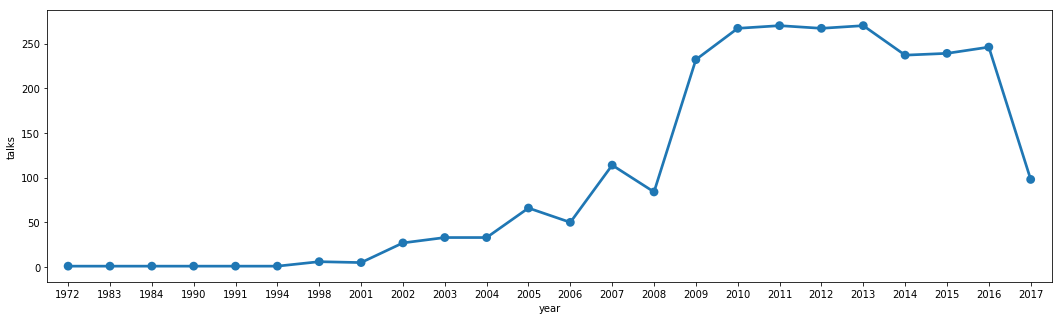

In [8]:
#Viewing TED Talks by Filmed date by year
df['year'] = df['film_date'].apply(lambda x: x.split('-')[0])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

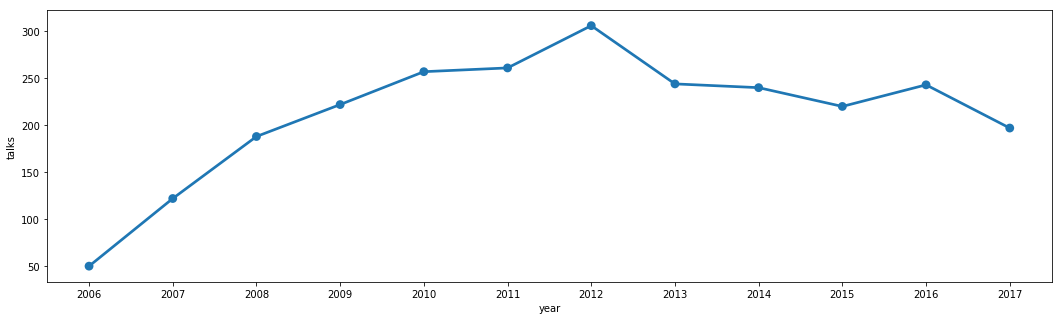

In [9]:
#Viewing TED Talks by Published date by year
df['year'] = df['published_date'].apply(lambda x: x.split('-')[0])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

In [25]:
import plotly.express as px
data = df
fig = px.bar(data, x='year', y='views')
fig.show()

In [13]:
year_df.head()

,year,talks
0,2012,306
1,2011,261
2,2010,257
3,2013,244
4,2016,243


In [23]:

year_df
fig = px.scatter(year_df, x='year', y="talks", size="talks", color="talks",
           hover_name="talks", log_x=False, size_max=60)
fig.show()



In [24]:
fig2 = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig2.show()

In [27]:
px.bar(year_df, x='year', y='talks')

# Theme Analysis

In [ ]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [ ]:
#Splitting the tags into seperate rows, and stacking them together
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [ ]:
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

In [ ]:
theme_df.info()

# Additional ideas

Carry out additional analysis of data

Build Dash Dashboard: http://campa-gupta.herokuapp.com/

# References:

https://www.kaggle.com/rounakbanik/ted-data-analysis

https://www.kaggle.com/rounakbanik/ted-talks/kernels